# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

# Step 1: Read in Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression


df = pd.read_csv('Resources/kc_house_data_train.csv', index_col=0)
df = df.drop(['id'], axis=1)

In [2]:
#adjusting bedrooms outliers 
df['bedrooms'] = df['bedrooms'].apply(lambda x : 9 if x > 9 else x)
#np.where(df['my_channel'] > 20000, 0, df['my_channel'])

In [3]:
# #create a heatmap to visualize the correlations
# fig, ax = plt.subplots(figsize=(25,15)) # figsize to make larger
# corr = df.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr, mask=mask, cmap='bwr', center=0, annot=True)

# # fix for matplotlib bug that cuts off top/bottom of seaborn viz
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

# plt.show()

# Step 2: EDA
### Initial Findings and planning
- **highest correlations:** 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15' (check for outliers and extreme values)
    - sqft_living seems like a better predictor
- **suprisingly low correlations:** 'bedrooms', 'waterfront', 'view', 'condition', 'renovated_0' (manipulate to create higher correlations)
- check out for outliers in price by sqft
- 33 bedrooms outlier
- bin `condition` into 3 categories: 1/2, 3/4, and 5
- bin `view` into 3 categories: 0, 1&2, 3, 4 (create poly?)
- `grade` poly?
- dummy code zip codes
- check out distances from Seattle city center with `lat` and `long`
- viz for floors
- waterfront: t-test

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141006T000000,365000.00,4,2.25,2070,8893,2.00,0,0,4,8,2070,0,1986,0,98058,47.44,-122.16,2390,7700
1,20140821T000000,865000.00,5,3.00,2900,6730,1.00,0,0,5,8,1830,1070,1977,0,98115,47.68,-122.28,2370,6283
2,20140815T000000,1038000.00,4,2.50,3770,10893,2.00,0,2,3,11,3770,0,1997,0,98006,47.56,-122.13,3710,9685
3,20150331T000000,1490000.00,3,3.50,4560,14608,2.00,0,2,3,12,4560,0,1990,0,98034,47.70,-122.23,4050,14226
4,20140714T000000,711000.00,3,2.50,2550,5376,2.00,0,0,3,9,2550,0,2004,0,98052,47.66,-122.08,2250,4050


In [5]:
#changing date format workable month
df['month_sold'] = pd.to_datetime(df['date'].str.slice(0,8), format='%Y%m%d', errors='ignore').dt.month
df.drop('date',axis=1,inplace=True)


In [6]:
# sns.pairplot(df[['bathrooms', 'bedrooms', 'lat', 'long', 'month_sold', 'sqft_above', 'sqft_basement', 'sqft_living', 'grade', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'yr_built', 'yr_renovated', 'price']], corner=True)


In [7]:
# # Bar plots of categorical data
# #zipcode explored later
# fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

# categoricals = ['condition', 'floors', 'grade', 'month_sold', 'yr_sold', 'view']

# for col, ax in zip(categoricals, axes.flatten()):
#     (df.groupby(col)               # group values together by column of interest
#          .mean()['price']        # take the mean of the saleprice for each group
#          .plot
#          .bar(ax=ax))                # create a bar graph on the ax    
#     ax.set_title(col)                # Make the title the name of the column
# fig.tight_layout()

# Investigation

## Floors
create dummy columns

Text(0.5, 0, 'Floors')

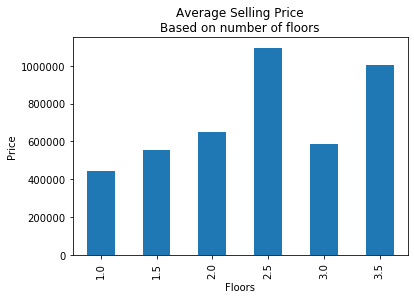

In [8]:
#Barplot Price v number of floors
df.groupby('floors')['price'].mean().plot(kind='bar')

#Set labels
plt.title('Average Selling Price\nBased on number of floors', size=12)
plt.ylabel('Price')
plt.xlabel('Floors')

In [9]:
df['floors_x_sqft_living'] = df['floors']*df['sqft_living']


### Checking for outliers in strongly correlated variables
- cap square foot living
- Checking for outliers and trends in grade, bathrooms, sqft_living, sqft_above, sqft_living15

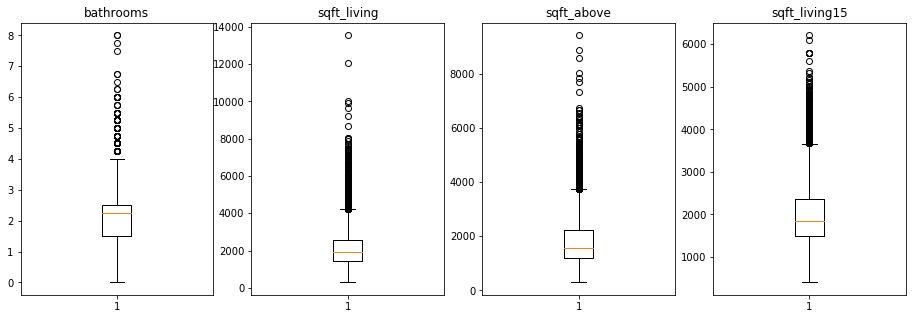

In [10]:
plt.figure(figsize=(20,5))

# ax3 = plt.subplot(1, 5, 1)
# plt.boxplot(df.grade)
# ax3.set_title('grade')

ax1 = plt.subplot(1, 5, 2)
plt.boxplot(df.bathrooms)
ax1.set_title('bathrooms')

ax2 = plt.subplot(1, 5, 3)
plt.boxplot(df.sqft_living)
ax2.set_title('sqft_living')


ax3 = plt.subplot(1, 5, 4)
plt.boxplot(df.sqft_above)
ax3.set_title('sqft_above')

ax3 = plt.subplot(1, 5, 5)
plt.boxplot(df.sqft_living15)
ax3.set_title('sqft_living15')

plt.show()

### 1. Bathrooms

In [11]:
#Run model without this parameter first
df['bathrooms'] = np.where(df.bathrooms>6, 6, df['bathrooms'])

Text(0.5, 0, 'Bathrooms')

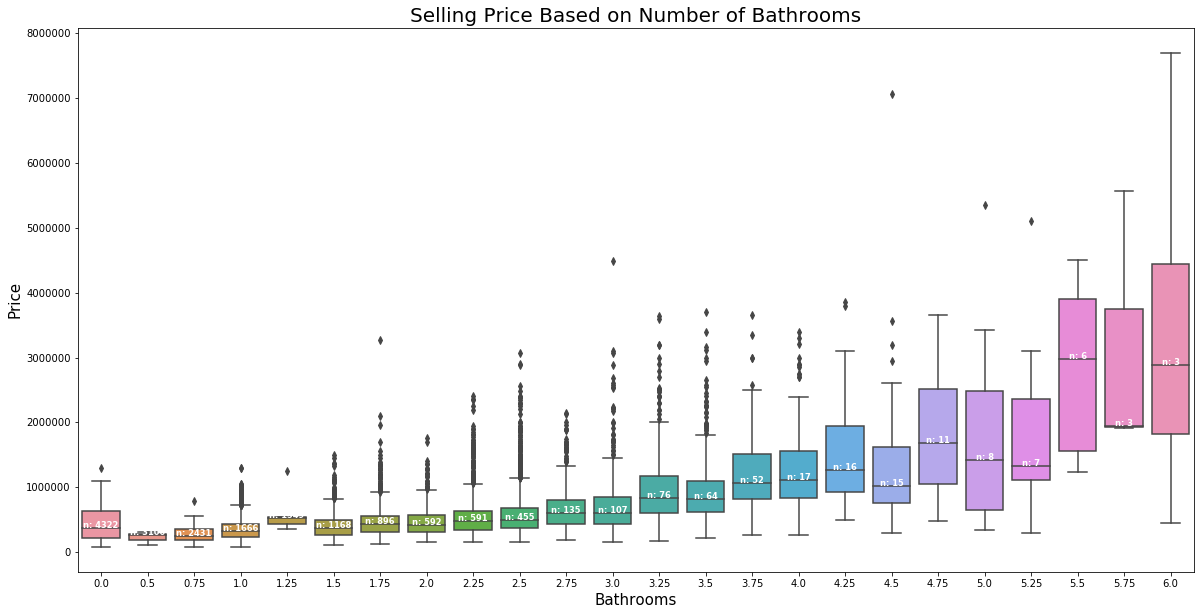

In [12]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=df['bathrooms'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['bathrooms'])['price'].median().values
nobs = df['bathrooms'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Selling Price Based on Number of Bathrooms', size=20)
plt.ylabel('Price', size=15)
plt.xlabel('Bathrooms', size=15)

### 2. Grade - Construction Rating

Text(0.5, 0, 'Grade')

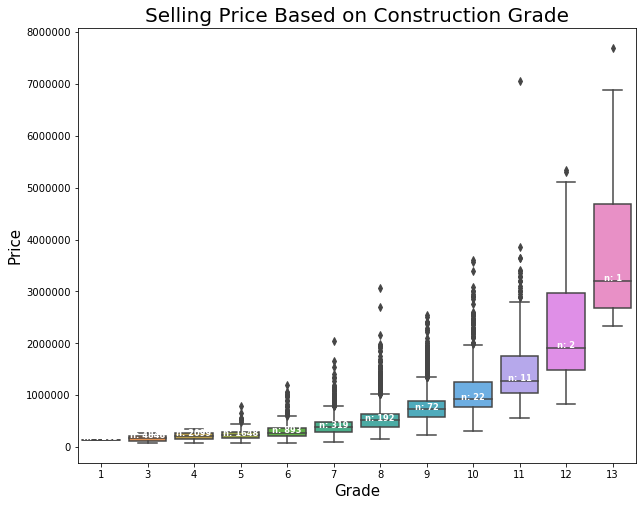

In [13]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x=df['grade'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['grade'])['price'].median().values
nobs = df['grade'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Selling Price Based on Construction Grade', size=20)
plt.ylabel('Price', size=15)
plt.xlabel('Grade', size=15)

### 3. Square Foot Living

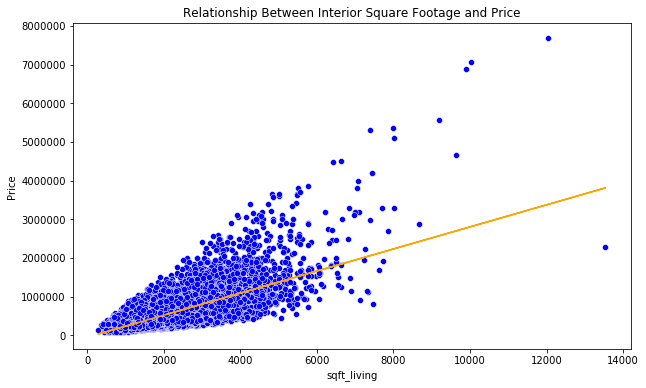

In [14]:
plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x="sqft_living", y="price", data=df, color = 'blue')
ax.set(xlabel="sqft_living", ylabel = "Price", title="Relationship Between Interior Square Footage and Price")
x=df["sqft_living"]
y=df["price"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

In [15]:
above_6std = df.price.mean()+(6*df.sqft_living.std())
above_6std

546259.6598772238

In [16]:
above_6std = df.price.mean()+(6*df.sqft_above.std())
above_6std

545715.1392829734

## Suprisingly weak correlations
- 'bedrooms', 'waterfront', 'view', 'condition', ('renovated_0' for later)

In [17]:
# sns.pairplot(df[['bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'price']], corner=True)
# plt.show()

## Bedrooms
poly3, cat, or normal?

Text(0.5, 0, 'Bedrooms')

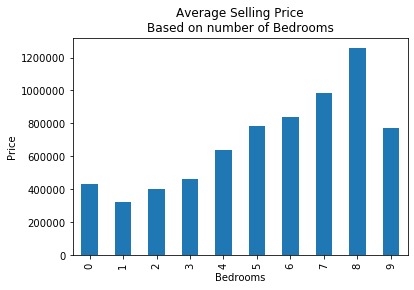

In [18]:
#Barplot Price v number of floors
df.groupby('bedrooms')['price'].mean().plot(kind='bar')

#Set labels
plt.title('Average Selling Price\nBased on number of Bedrooms', size=12)
plt.ylabel('Price')
plt.xlabel('Bedrooms')

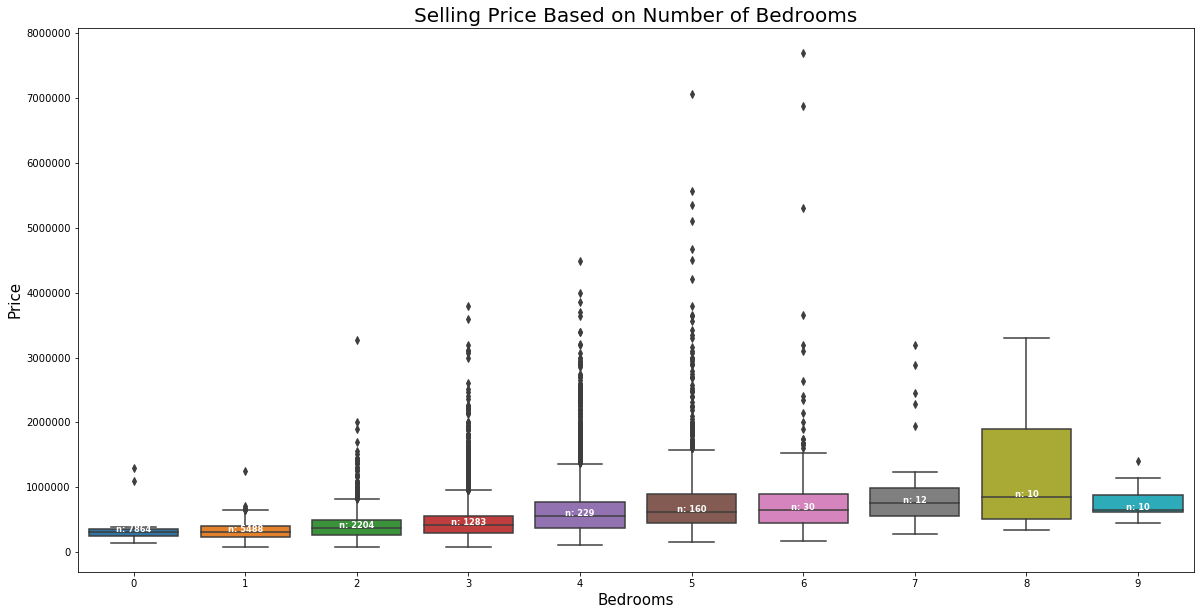

In [19]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=df['bedrooms'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['bedrooms'])['price'].median().values
nobs = df['bedrooms'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Selling Price Based on Number of Bedrooms', size=20)
plt.ylabel('Price', size=15)
plt.xlabel('Bedrooms', size=15)

plt.show()

## Waterfront

Text(0.5, 0, 'Waterfront Property')

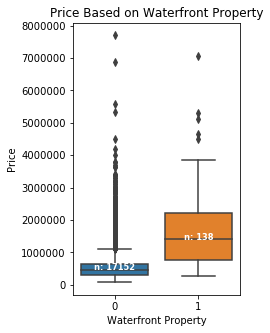

In [20]:
## Boxplot of Waterfront v. Price
plt.figure(figsize=(3,5))
ax = sns.boxplot(x=df['waterfront'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['waterfront'])['price'].median().values
nobs = df['waterfront'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Price Based on Waterfront Property')
plt.ylabel('Price')
plt.xlabel('Waterfront Property')

## View

Text(0.5, 0, 'View')

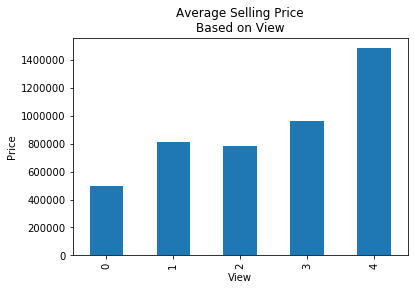

In [21]:
#Barplot Price v number of floors
df.groupby('view')['price'].mean().plot(kind='bar')

#Set labels
plt.title('Average Selling Price\nBased on View', size=12)
plt.ylabel('Price')
plt.xlabel('View')

## Condition
Create dummy columns

Text(0.5, 0, 'Condition')

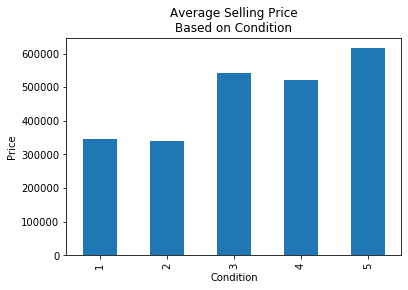

In [22]:
#Barplot Price v number of floors
df.groupby('condition')['price'].mean().plot(kind='bar')

#Set labels
plt.title('Average Selling Price\nBased on Condition', size=12)
plt.ylabel('Price')
plt.xlabel('Condition')

# Step 3: Clean
- already took care of bedroom outliers with Read-In
- reining in square footage outliers
- work on binning 
    - `condition` into 3 categories: 1/2, 3/4, and 5
    - `view` into 3 categories: 0, 1&2, 3, 4 (or create poly?)

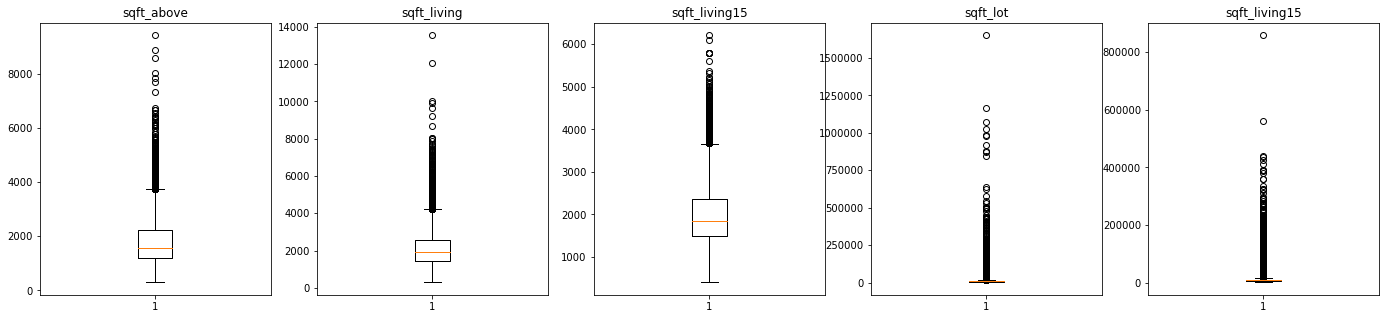

In [23]:
# Investigating Square footage outliers

plt.figure(figsize=(24,5))

ax3 = plt.subplot(1, 5, 1)
plt.boxplot(df.sqft_above)
ax3.set_title('sqft_above')

ax1 = plt.subplot(1, 5, 2)
plt.boxplot(df.sqft_living)
ax1.set_title('sqft_living')

ax2 = plt.subplot(1, 5, 3)
plt.boxplot(df.sqft_living15)
ax2.set_title('sqft_living15')


ax3 = plt.subplot(1, 5, 4)
plt.boxplot(df.sqft_lot)
ax3.set_title('sqft_lot')

ax3 = plt.subplot(1, 5, 5)
plt.boxplot(df.sqft_lot15)
ax3.set_title('sqft_living15')

plt.show()

In [24]:
# adjuting sqft home outliers to within 6 standard deviations of the mean
for col in ['sqft_above', 'sqft_living', 'sqft_living15']: 
    above_6std = df[col].mean()+(6*df[col].std())
    df[col] = np.where(df[col].values >above_6std, df[col].mean()+6*df[col].std(), df[col])
    
# adjusting lot outliers to within 9 standard deviations of the mean
for col in ['sqft_lot', 'sqft_lot15']: 
    above_9std = df[col].mean()+(9*df[col].std())
    df[col] = np.where(df[col].values >above_6std, df[col].mean()+9*df[col].std(), df[col])
    

# Try these to see if they improve model

In [25]:
#Create dummy columns of 'condition' 
df = pd.get_dummies(df, columns=['condition'], drop_first=True)

#Create dummy columns of 'floors'
df = pd.get_dummies(df, columns=['floors'], drop_first=True)

# Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [26]:
## RUN THIS CELL ONLY ONCE!

#Create new column 'age' for age of house
df['age'] = 2015 - df.yr_built

#Create dummy variable 'basement' y/n
df['basement'] = np.where(df['sqft_basement']>0 , 1, 0)
df = pd.get_dummies(df, columns=['basement'], drop_first=True)

#Create a new column 'neighbors_compared' with sqft_living - sqft_living15
df['neighbors_compared'] = df.sqft_living - df.sqft_living15

#Create dummy columns using 'nc_2'
df['nc2'] = np.where(df['sqft_living']> df['sqft_living15'] , 1, 0)
df = pd.get_dummies(df, columns=['nc2'], drop_first=True)


Playing with `renovated` columns:

In [27]:
#RUN CELL ONLY ONCE

#Create new column 'last_renovted' for how long ago since last renovation
df['last_ren'] = np.where(df['yr_renovated'] > 0, (2015 - df['yr_renovated']), 0)

#Create new column 'last_ren2' for how long (years) since last renovation and including age if no renovation
df['last_ren2'] = np.where(df['yr_renovated'] > 0, (2015 - df['yr_renovated']), (2015 - df['yr_built']))

#Create dummy columns using 'renovated'
df['renovated'] = np.where(df['yr_renovated']>0 , 1, 0)
df = pd.get_dummies(df, columns=['renovated'], drop_first=True)

#### Create dummy zip codes

In [28]:
# Create dummy variables for zipcodes
zip_dummies = pd.get_dummies(df['zipcode'].astype(str), drop_first=True)
df.drop('zipcode',axis=1,inplace=True)

## Checking on new features

In [29]:
#Run below cell for correlation matrix

In [30]:
# # Correlation matrix
# fig, ax = plt.subplots(figsize=(20, 15))

# corr = df.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr, mask=mask, cmap='bwr', center=0, annot=True)

# # fix for matplotlib bug that cuts off top/bottom of seaborn viz
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

# plt.show()

In [31]:
# #Checking on new features
# sns.pairplot(df[['age', 'last_ren', 'last_ren2', 'neighbors_compared', 'renovated_1', 'basement_1', 'price']], corner=True)


In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold,floors_x_sqft_living,condition_2,condition_3,condition_4,condition_5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,age,basement_1,neighbors_compared,nc2_1,last_ren,last_ren2,renovated_1
0,365000.00,4,2.25,2070.00,395985.01,0,0,8,2070.00,0,1986,0,47.44,-122.16,2390.00,257920.41,10,4140.00,0,0,1,0,0,1,0,0,0,29,0,-320.00,0,0,29,0
1,865000.00,5,3.00,2900.00,395985.01,0,0,8,1830.00,1070,1977,0,47.68,-122.28,2370.00,257920.41,8,2900.00,0,0,0,1,0,0,0,0,0,38,1,530.00,1,0,38,0
2,1038000.00,4,2.50,3770.00,395985.01,0,2,11,3770.00,0,1997,0,47.56,-122.13,3710.00,257920.41,8,7540.00,0,1,0,0,0,1,0,0,0,18,0,60.00,1,0,18,0
3,1490000.00,3,3.50,4560.00,395985.01,0,2,12,4560.00,0,1990,0,47.70,-122.23,4050.00,257920.41,3,9120.00,0,1,0,0,0,1,0,0,0,25,0,510.00,1,0,25,0
4,711000.00,3,2.50,2550.00,5376.00,0,0,9,2550.00,0,2004,0,47.66,-122.08,2250.00,4050.00,7,5100.00,0,1,0,0,0,1,0,0,0,11,0,300.00,1,0,11,0


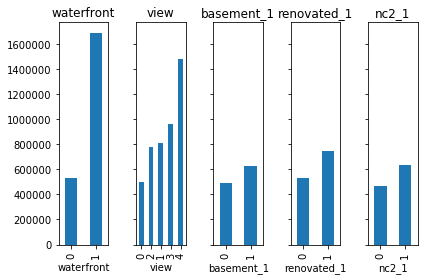

In [33]:
# Create bar plots
fig, axes = plt.subplots(nrows=1, ncols=5, sharey=True)

categoricals = ['waterfront', 'view', 'basement_1', 'renovated_1', 'nc2_1']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col).mean()['price']
         .sort_values()              # sort the groups in ascending order if desired
         .plot.bar(ax=ax))
    ax.set_title(col)
fig.tight_layout()

In [34]:
# Concat df and zip dummies DFs
df = pd.concat([df, zip_dummies], axis=1)

### 4.1) Identify a categorical variable in the data set and create dummy columns.
- condition, view, bathrooms, bedrooms, floors, zipcode

In [35]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [36]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [37]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [38]:
#df.head() # Sanity Check to remove dummy variables

In [39]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month_sold',
 'floors_x_sqft_living',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'floors_3.5',
 'age',
 'basement_1',
 'neighbors_compared',
 'nc2_1',
 'last_ren',
 'last_ren2',
 'renovated_1',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',

In [40]:
features = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month_sold',
 'floors_x_sqft_living',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'floors_3.5',
 'age',
 'basement_1',
 'neighbors_compared',
 'nc2_1',
 'last_ren',
 'last_ren2',
 'renovated_1',]
df_features = df[features]
target = df['price']

In [41]:
# # your code here
# poly_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
#        'sqft_basement', 'yr_renovated', 'lat', 'long',
#        'sqft_living15', 'sqft_lot15', 'yr_sold', 'month_sold',
#        'age', 'last_ren2', 'neighbors_compared']

# poly2_features = pd.DataFrame()
# poly3_features = pd.DataFrame()

# for feat in poly_cols:
#     poly2_features[feat+'^2'] = df[feat]**2
# for feat in poly_cols:    
#     poly3_features[feat+'^3'] = df[feat]**3
    

In [42]:
df[features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold,floors_x_sqft_living,condition_2,condition_3,condition_4,condition_5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,age,basement_1,neighbors_compared,nc2_1,last_ren,last_ren2,renovated_1
0,4,2.25,2070.00,395985.01,0,0,8,2070.00,0,1986,0,47.44,-122.16,2390.00,257920.41,10,4140.00,0,0,1,0,0,1,0,0,0,29,0,-320.00,0,0,29,0
1,5,3.00,2900.00,395985.01,0,0,8,1830.00,1070,1977,0,47.68,-122.28,2370.00,257920.41,8,2900.00,0,0,0,1,0,0,0,0,0,38,1,530.00,1,0,38,0
2,4,2.50,3770.00,395985.01,0,2,11,3770.00,0,1997,0,47.56,-122.13,3710.00,257920.41,8,7540.00,0,1,0,0,0,1,0,0,0,18,0,60.00,1,0,18,0
3,3,3.50,4560.00,395985.01,0,2,12,4560.00,0,1990,0,47.70,-122.23,4050.00,257920.41,3,9120.00,0,1,0,0,0,1,0,0,0,25,0,510.00,1,0,25,0
4,3,2.50,2550.00,5376.00,0,0,9,2550.00,0,2004,0,47.66,-122.08,2250.00,4050.00,7,5100.00,0,1,0,0,0,1,0,0,0,11,0,300.00,1,0,11,0


# Step 5: Train-Test Split

### 5.1) Perform a train-test split of the data.

This code will need to be re-run with list(df.columns) if features are added

In [43]:
# df.head() #Sanity Check

In [44]:
df_features = df[features]
target = df['price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 33) Target:  (13832,)
Training set - Features:  (3458, 33) Target:  (3458,)


# Log
- LOG Training Root Mean Squared Error: 188833
- LOG Testing Root Mean Squared Error:  179438

In [46]:
y_log = np.log(y_train)

# instantiate a linear regression object and fit
lm_log = LinearRegression()
lm_log = lm_log.fit(X_train, y_log)

In [47]:
log_train_pred = lm_log.predict(X_train)

# exponentiate the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('LOG Training Root Mean Squared Error:' , train_rmse)

LOG Training Root Mean Squared Error: 188833.79796143202


In [48]:
log_test_pred = lm_log.predict(X_test)

# exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))

print('LOG Training Root Mean Squared Error:' , train_rmse)
print('LOG Testing Root Mean Squared Error: ' , log_test_rmse)

LOG Training Root Mean Squared Error: 188833.79796143202
LOG Testing Root Mean Squared Error:  179438.58947236522


In [49]:
# Checking mae vs rmse
metrics.mean_absolute_error(y_train, y_train_pred) 

108365.29843434735

In [50]:
# #If we decide to use Log, run this cell!!

# # reassign y_test_pred to our log model
# y_test_pred = lm_log.predict(X_test)

# #our model predicted the log of gross, so now we must exponentiate to get value back in $
# y_test_pred = np.exp(y_test_pred)

# test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

# #print('Testing Root Mean Squared Error:' , test_rmse)
# print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

# Polynomial Features

## Poly 2

before feature selection
- Training:  117785
- Testing:  212585

#### Poly with Log and Kbest (83 features)
- KBEST Training RMSE: 171,302
- KBEST Testing RMSE: 170,581

without Log, with Kbest?

#### Poly with Log and RFE (after zips)
- RFE Training RMSE: 179,763
- RFE Testing RMSE: 170,627

##### with log, no feature selection

In [51]:
poly_features = df[features]
target = df['price']

In [52]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(poly_features)
poly2_columns = poly_2.get_feature_names(poly_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
#df_poly2.head() #Sanity Check

In [53]:
# Concat dfs together to test
df_poly2 = pd.concat([df_poly2, zip_dummies], axis=1)
# df_poly2.head()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=42,test_size=0.2)

In [55]:
# instantiate a linear regression object and fit to training data
lm_2 = LinearRegression()
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 117785.53262229954


In [56]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 212585.73185541172
Training:  117785 vs. Testing:  212585


##### Poly2 log, KBest83 features
- KBEST Training Root Mean Squared Error: 171302
- KBEST Testing Root Mean Squared Error: 170581

did worse after zips added (28 features):
- KBEST Training Root Mean Squared Error: 193908
- KBEST Testing Root Mean Squared Error: 187826

In [57]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=200) # <----- number of features you want
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()] #kept columns
removed_columns = X_train.columns[~selector.get_support()] #removed columns
#list(selected_columns)
#len(removed_columns)

In [58]:
len(selected_columns)

200

In [59]:
#instantiate a linear regression object and fit to train data
lm_kbest = LinearRegression()
lm_kbest.fit(X_train[selected_columns], y_train)

# Training Root Mean Squared Error
y_train_kbest = lm_kbest.predict(X_train[selected_columns])
trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))
print('KBEST Training Root Mean Squared Error:' , trainK_rmse)

# Testing Root Mean Squared Error
y_kbest = lm_kbest.predict(X_test[selected_columns])
testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))
print('KBEST Testing Root Mean Squared Error:' , testK_rmse)

KBEST Training Root Mean Squared Error: 151355.095360907
KBEST Testing Root Mean Squared Error: 173094.47195141652


##### RFE with Log
- Training RMSE: 201,630
- Testing RMSE: 197,283

after zips
- Training RMSE: 179,763
- Testing RMSE: 170,627

In [60]:
X_train = X_train[selected_columns]
X_train.shape

(13832, 200)

In [61]:
from sklearn.feature_selection import RFECV

ols = linear_model.LinearRegression()

selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
F

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=1)

In [62]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]
# list(selected_rfe)
# list(removed_rfe)

In [63]:
#instantiate a linear regression object and fit to train
lm_rfe = LinearRegression()
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

# Train
y_rfe = lm_rfe.predict(X_train[selected_rfe])
trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))
print('Training Root Mean Squared Error:' , trainRFE_rmse)

# Test
y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])
testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))
print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 173868.45088472738
Testing Root Mean Squared Error: 163009.4509010534


In [64]:
list(selected_rfe)

['bedrooms',
 'waterfront',
 'grade',
 'lat',
 'bedrooms waterfront',
 'bedrooms lat',
 'bedrooms long',
 'bedrooms floors_2.0',
 'bedrooms basement_1',
 'bedrooms nc2_1',
 'bathrooms^2',
 'bathrooms waterfront',
 'bathrooms grade',
 'bathrooms lat',
 'bathrooms long',
 'bathrooms floors_2.0',
 'bathrooms basement_1',
 'sqft_living long',
 'waterfront^2',
 'waterfront grade',
 'waterfront lat',
 'waterfront long',
 'waterfront condition_3',
 'waterfront floors_2.0',
 'waterfront basement_1',
 'waterfront nc2_1',
 'view grade',
 'view lat',
 'view long',
 'view condition_3',
 'view floors_2.0',
 'view basement_1',
 'grade^2',
 'grade lat',
 'grade long',
 'grade nc2_1',
 'sqft_above lat',
 'sqft_above long',
 'sqft_above basement_1',
 'sqft_basement lat',
 'sqft_basement long',
 'lat^2',
 'lat long',
 'lat sqft_living15',
 'lat neighbors_compared',
 'floors_2.0 basement_1',
 'floors_2.0 nc2_1',
 '98004']

## Poly 3
performs worse than Poly2
#### Poly3 KBest (85 features) 
- KBEST Training Root Mean Squared Error: 178266
- KBEST Testing Root Mean Squared Error: 189853

#### Poly3 KBest (85 features), RFE
- Training Root Mean Squared Error: 185904
- Testing Root Mean Squared Error: 180958

In [65]:
# poly_3 = PolynomialFeatures(degree=3, include_bias=False)
# poly3_data = poly_3.fit_transform(df_features)
# poly3_columns = poly_3.get_feature_names(df_features.columns)
# df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)
# df_poly3.head()

In [66]:
# # Concat dfs together to test
# df_poly3 = pd.concat([df_poly3, zip_dummies], axis=1)
# df_poly3.head()

##### Poly3 KBest

In [67]:
# from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

# selector = SelectKBest(f_regression, k=85) # <----- f_regression and number of features you want
# selector.fit(X_train, y_train)

# selected_columns = X_train.columns[selector.get_support()] #kept columns
# removed_columns = X_train.columns[~selector.get_support()] #removed columns
# #list(selected_columns)
# # list(removed_columns)

In [68]:
# #instantiate a linear regression object and fit to train data
# lm_kbest = LinearRegression()
# lm_kbest.fit(X_train[selected_columns], y_train)

# # Training Root Mean Squared Error
# y_train_kbest = lm_kbest.predict(X_train[selected_columns])
# trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))
# print('KBEST Training Root Mean Squared Error:' , trainK_rmse)

# # Testing Root Mean Squared Error
# y_kbest = lm_kbest.predict(X_test[selected_columns])
# testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))
# print('KBEST Testing Root Mean Squared Error:' , testK_rmse)

##### Poly3 RFE

In [69]:
# X_train = X_train[selected_columns]
# X_train.shape

In [70]:
# from sklearn.feature_selection import RFECV
# ols = linear_model.LinearRegression()

# selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# # Fit recursive feature eliminator 
# selector.fit(X_train, y_train)

In [71]:
# selected_rfe = X_train.columns[selector.support_]
# removed_rfe = X_train.columns[~selector.support_]
# # list(selected_rfe)
# # list(removed_rfe)

In [72]:
# #instantiate a linear regression object and fit to train
# lm_rfe = LinearRegression()
# lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

# # Train
# y_rfe = lm_rfe.predict(X_train[selected_rfe])
# trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))
# print('Training Root Mean Squared Error:' , trainRFE_rmse)

# # Test
# y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])
# testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))
# print('Testing Root Mean Squared Error:' , testRFE_rmse)

In [73]:
len(selected_rfe)

48

# Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

# Step 7: Evaluate your different models in order to determine the best model overall.

# Step 8:  Refit your best model to the entire dataset.

In [74]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_final.fit(df_poly2[selected_columns], target)

In [75]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15',
 'floors_x_sqft_living',
 'neighbors_compared',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms grade',
 'bedrooms sqft_above',
 'bedrooms sqft_basement',
 'bedrooms yr_built',
 'bedrooms lat',
 'bedrooms long',
 'bedrooms sqft_living15',
 'bedrooms floors_x_sqft_living',
 'bedrooms floors_2.0',
 'bedrooms basement_1',
 'bedrooms neighbors_compared',
 'bedrooms nc2_1',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_basement',
 'bathrooms yr_built',
 'bathrooms lat',
 'bathrooms long',
 'bathrooms sqft_living15',
 'bathrooms sqft_lot15',
 'bathrooms month_sold',
 'bathrooms floors_x_sqft_living',
 'bathrooms floors_2.0',
 'bathrooms age',
 'bathrooms basement_1',
 

## Checking model attributes to copy to holdout notebook

In [76]:
list(df_poly2[selected_columns].columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15',
 'floors_x_sqft_living',
 'neighbors_compared',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms grade',
 'bedrooms sqft_above',
 'bedrooms sqft_basement',
 'bedrooms yr_built',
 'bedrooms lat',
 'bedrooms long',
 'bedrooms sqft_living15',
 'bedrooms floors_x_sqft_living',
 'bedrooms floors_2.0',
 'bedrooms basement_1',
 'bedrooms neighbors_compared',
 'bedrooms nc2_1',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_basement',
 'bathrooms yr_built',
 'bathrooms lat',
 'bathrooms long',
 'bathrooms sqft_living15',
 'bathrooms sqft_lot15',
 'bathrooms month_sold',
 'bathrooms floors_x_sqft_living',
 'bathrooms floors_2.0',
 'bathrooms age',
 'bathrooms basement_1',
 

In [77]:
len(lm_final.coef_)

200

# Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [78]:
import pickle

#Model
pickle_out = open("poly2_modelx2.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()